# State Space Model（状態空間モデル）

## 季節物商品の四半期データ

In [5]:
data.url <- "https://raw.githubusercontent.com/iwanami-datascience/vol1/master/matsuura/example2/input/data-season.txt"
data <- read.csv(url(data.url))
Y <- data$Y

In [7]:
library(dlm)
dlm.mod1 <- dlmModPoly(order = 1, dV = 1, dW = 1, m0 = 0, C0 = 1e+07)
dlm.flt1 <- dlmFilter(y = Y, mod = dlm.mod1)

In [8]:
# state value
head(dlm.flt1$m)

[1]  0.00000 18.07300 21.80100 18.43162 16.26457 16.78473

In [11]:
dlm.flt1.df <- dropFirst(dlm.flt1$m)
head(dlm.flt1.df)

[1] 18.07300 21.80100 18.43162 16.26457 16.78473 20.14279

In [22]:
X = matrix(1:length(Y))

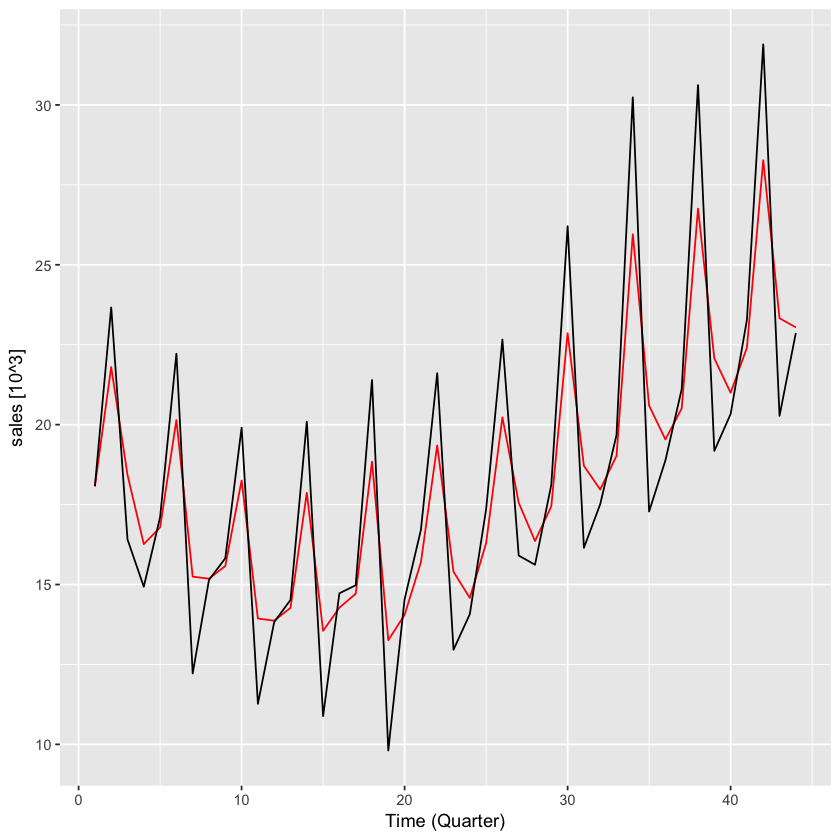

In [40]:
library(ggplot2)
p <- ggplot()
p <- p + geom_line(data = data.frame(X, dlm.flt1.df), aes(x = X, y = dlm.flt1.df), color = 'red')
p <- p + geom_line(data = data.frame(X, Y), aes(x = X, y = Y), color = 'black')
p <- p + xlab('Time (Quarter)')
p <- p + ylab('sales [10^3]')
print(p)

In [42]:
dlm.mod2 <- dlmModPoly(order = 1, dV = 1, dW = 5, m0 = 0, C0 = 1e+07)
dlm.flt2 <- dlmFilter(Y, dlm.mod2)

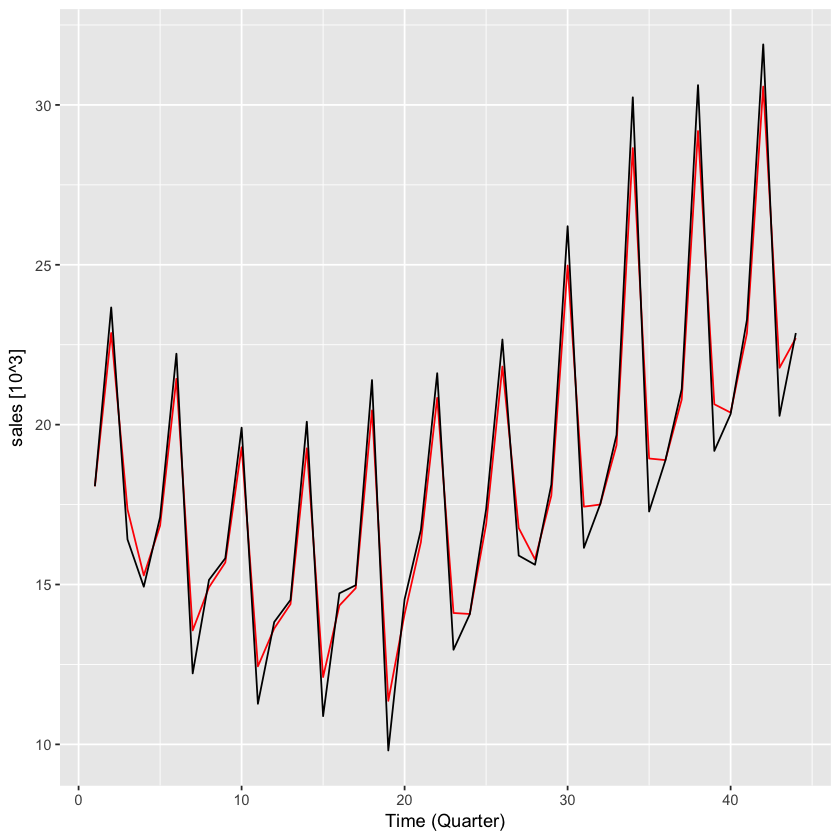

In [44]:
dlm.flt2.df <- dropFirst(dlm.flt2$m)
p <- ggplot()
p <- p + geom_line(data = data.frame(X, dlm.flt2.df), aes(x = X, y = dlm.flt2.df), color = 'red')
p <- p + geom_line(data = data.frame(X, Y), aes(x = X, y = Y), color = 'black')
p <- p + xlab('Time (Quarter)')
p <- p + ylab('sales [10^3]')
print(p)

In [45]:
dlm.build3 <- function(par) {
    dlmModPoly(order = 1, dV = exp(par[1]), dW = exp(par[2]))
    }

In [46]:
dlm.mle3 <- dlmMLE(y = Y, parm = c(0, 0), build = dlm.build3)
dlm.mod3 <- dlm.build3(dlm.mle3$par)

In [47]:
dlm.flt3 <- dlmFilter(Y, dlm.mod3)
dlm.smt3 <- dlmSmooth(Y, dlm.mod3)

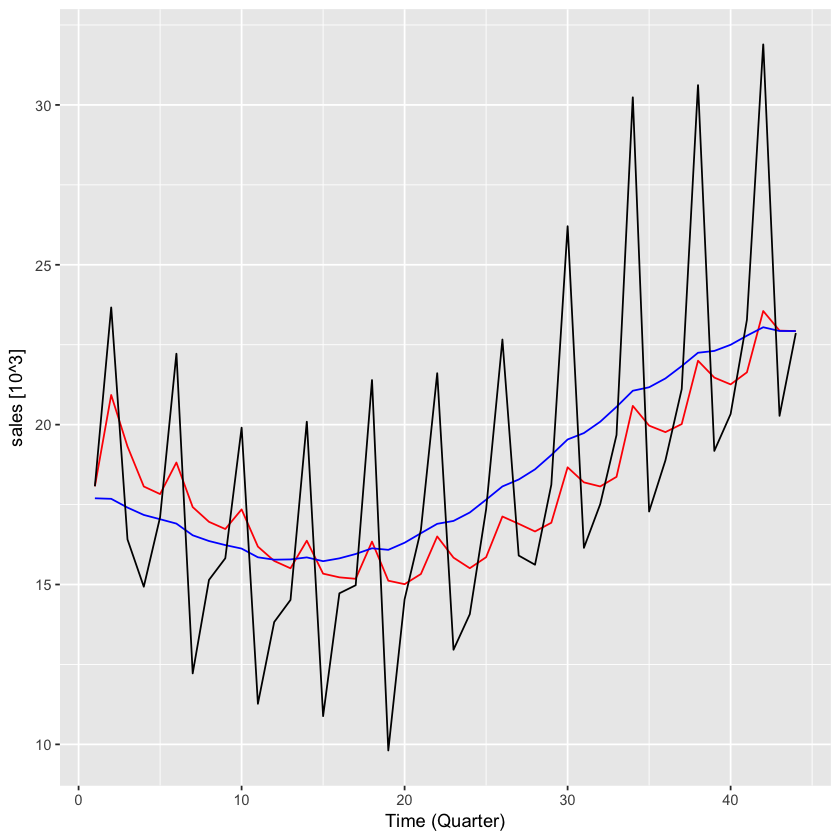

In [52]:
dlm.flt3.df <- dropFirst(dlm.flt3$m)
dlm.smt3.df <- dropFirst(dlm.smt3$s)
p <- ggplot()
p <- p + geom_line(data = data.frame(X, dlm.flt3.df), aes(x = X, y = dlm.flt3.df), color = 'red')
p <- p + geom_line(data = data.frame(X, dlm.smt3.df), aes(x = X, y = dlm.smt3.df), color = 'blue')
p <- p + geom_line(data = data.frame(X, Y), aes(x = X, y = Y), color = 'black')
p <- p + xlab('Time (Quarter)')
p <- p + ylab('sales [10^3]')
print(p)

## Seasonal（季節調整項）

In [53]:
dlm.build4 <- function(par){
    mod <- dlmModPoly(order = 1) + dlmModSeas(frequency = 4)
    V(mod) <- exp(par[1])
    diag(W(mod))[1:2] <- exp(par[2:3])
    m0(mod) <- c(20, 0, 0, 0)
    return(mod)
    }

dlm.mle4 <- dlmMLE(Y, parm = rep(0, 3), build = dlm.build4)
dlm.mod4 <- dlm.build4(dlm.mle4$par)

In [54]:
FF(dlm.mod4)
GG(dlm.mod4)

1,1,0,0


1,0,0,0
0,-1,-1,-1
0,1,0,0
0,0,1,0


In [55]:
dlm.fil4 <- dlmFilter(Y, dlm.mod4)
dlm.for4 <- dlmForecast(dlm.fil4, nAhead = 8)

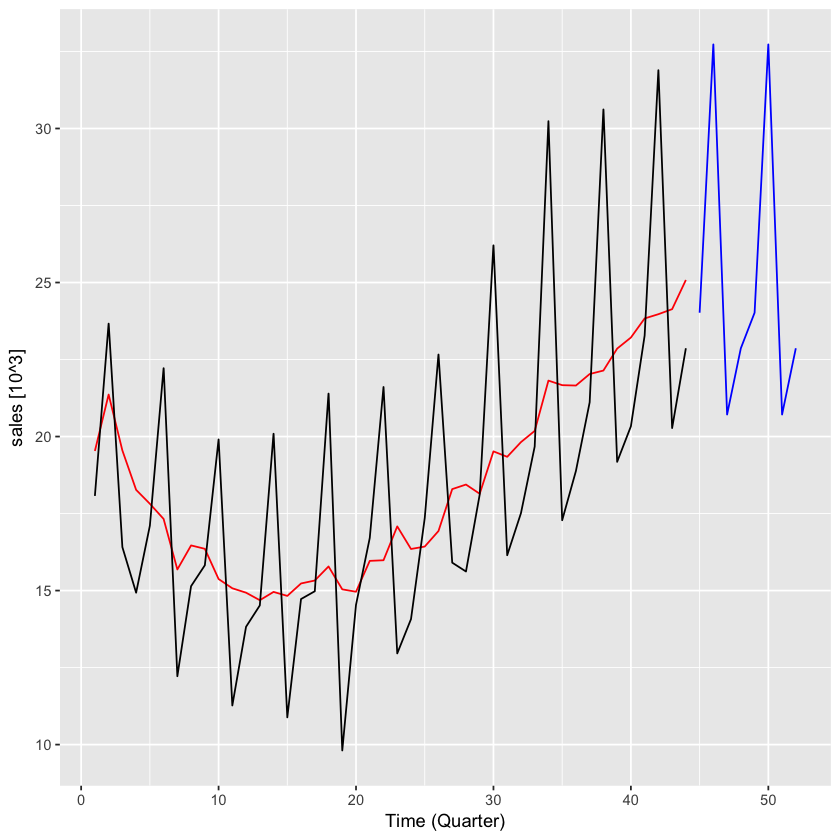

In [82]:
dlm.fil4.df <- dropFirst(dlm.fil4$m[,1])
X2 <- matrix(45:52)
p <- ggplot()
p <- p + geom_line(data = data.frame(X, dlm.fil4.df), aes(x = X, y = dlm.fil4.df), color = 'red')
p <- p + geom_line(data = data.frame(X2, dlm.for4$f), aes(x = X2, y = dlm.for4$f), color = 'blue')
p <- p + geom_line(data = data.frame(X, Y), aes(x = X, y = Y), color = 'black')
p <- p + xlab('Time (Quarter)')
p <- p + ylab('sales [10^3]')
print(p)